In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import matplotlib.path as mpath
import momlevel as ml

# parameters for setting circular cutoff for Southern Ocean plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

Matplotlib is building the font cache; this may take a moment.


In [2]:
datasets_historical = ["ERA5", "JRA55-do", "odiv-2", "odiv-231", "odiv-255"]

ds_era = xr.open_zarr("/work/Katherine.Turner/CM4X-model-output/ERA5/monthly_winds_zarr", use_cftime=True)
ds_jra = xr.open_zarr("/work/Katherine.Turner/CM4X-model-output/JRA-do/monthly_winds_zarr", use_cftime=True)
ds_2 = xr.open_zarr("/work/Katherine.Turner/CM4X-model-output/odiv-2/monthly_winds_zarr", use_cftime=True)
ds_231 = xr.open_zarr("/work/Katherine.Turner/CM4X-model-output/odiv-231/monthly_winds_zarr", use_cftime=True)
ds_255 = xr.open_zarr("/work/Katherine.Turner/CM4X-model-output/odiv-255/monthly_winds_zarr", use_cftime=True)

In [3]:
u10_era = ds_era.u10.sel(time=slice('1981-01-01','2010-12-31'), lat=slice(0,-90))
u10_jra = ds_jra.uas.sel(time=slice('1981-01-01','2010-12-31'), lat=slice(-90,0))
u10_2 = ds_2.u_ref.sel(time=slice('1981-01-01','2010-12-31'), lat=slice(-90,0))
u10_231 = ds_231.u_ref.sel(time=slice('1981-01-01','2010-12-31'), lat=slice(-90,0))
u10_255 = ds_255.u_ref[-360:,:,:].sel(lat=slice(-90,0))

u10_era_c96 = u10_era.interp(lat=u10_2.lat.data, lon=u10_2.lon.data)
u10_era_c192 = u10_era.interp(lat=u10_231.lat.data, lon=u10_231.lon.data)

u10_jra_c96 = u10_jra.interp(lat=u10_2.lat.data, lon=u10_2.lon.data)
u10_jra_c192 = u10_jra.interp(lat=u10_231.lat.data, lon=u10_231.lon.data)

# Zonal average wind fields for historical period
plus maps of biases of CM4/CM4X against ERA5 and JRA55-do

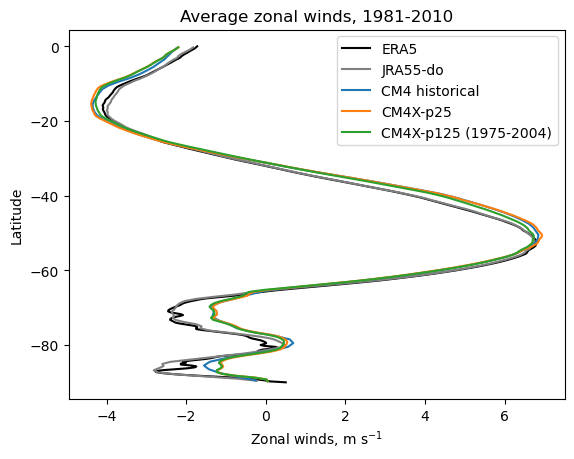

In [4]:
u10_era.mean(dim={"time", "lon"}).plot(y='lat', color='k', label="ERA5")
u10_jra.mean(dim={"time", "lon"}).plot(y='lat', color='grey', label="JRA55-do")
u10_2.mean(dim={"time", "lon"}).plot(y='lat', label="CM4 historical")
u10_231.mean(dim={"time", "lon"}).plot(y='lat', label="CM4X-p25")
u10_255.mean(dim={"time", "lon"}).plot(y='lat', label="CM4X-p125 (1975-2004)")
plt.title("Average zonal winds, 1981-2010")
plt.xlabel("Zonal winds, m s$^{-1}$")
plt.ylabel("Latitude")
plt.legend()
plt.savefig("/home/Katherine.Turner/SH_westerlies_hist.png", format="png", dpi=100)

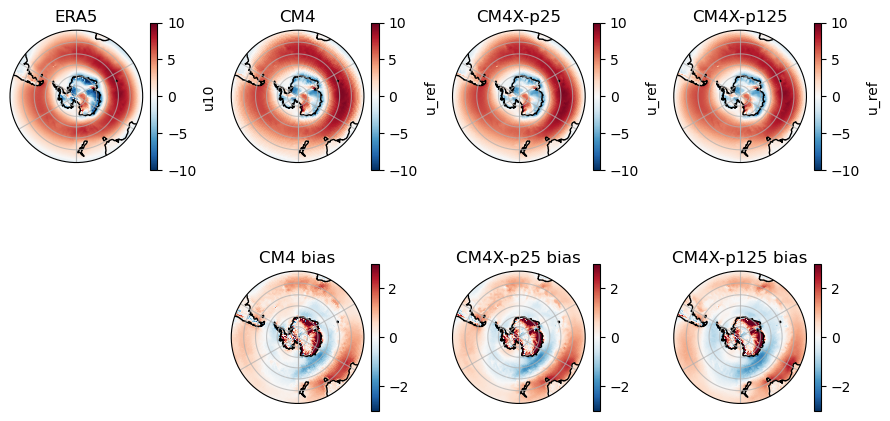

In [35]:
titles = ["ERA5", "CM4", "CM4X-p25", "CM4X-p125",
          "", "CM4 bias", "CM4X-p25 bias", "CM4X-p125 bias"]

fig,axs = plt.subplots(ncols=4, nrows=2, sharey=True, 
                       subplot_kw={'projection': ccrs.SouthPolarStereo()},
                       figsize=(9,5))
axs=axs.flatten()

u10_era.mean(dim="time").plot(ax=axs[0], 
                              transform=ccrs.PlateCarree(), 
                              vmin=-10, vmax=10, extend="neither",
                              cmap=plt.get_cmap("RdBu_r"),
                              cbar_kwargs = {"aspect":20, "fraction":.05})
u10_2.mean(dim="time").plot(ax=axs[1], 
                              transform=ccrs.PlateCarree(), 
                              vmin=-10, vmax=10, extend="neither", 
                              cmap=plt.get_cmap("RdBu_r"),
                              cbar_kwargs = {"aspect":20, "fraction":.05})
u10_231.mean(dim="time").plot(ax=axs[2], 
                              transform=ccrs.PlateCarree(), 
                              vmin=-10, vmax=10, extend="neither", 
                              cmap=plt.get_cmap("RdBu_r"),
                              cbar_kwargs = {"aspect":20, "fraction":.05})
u10_255.mean(dim="time").plot(ax=axs[3], transform=ccrs.PlateCarree(), 
                              vmin=-10, vmax=10, extend="neither", 
                              cmap=plt.get_cmap("RdBu_r"),
                              cbar_kwargs = {"aspect":20, "fraction":.05})
(u10_2.mean(dim="time") - u10_era_c96.mean(dim="time")).plot(ax=axs[5], 
                                                                  transform=ccrs.PlateCarree(),
                                                                  vmin= -3, vmax=3, extend="neither",
                                                                  cmap= plt.get_cmap("RdBu_r"),
                                                                  cbar_kwargs = {"aspect":20, "fraction":.05})
(u10_231.mean(dim="time") - u10_era_c192.mean(dim="time")).plot(ax=axs[6], 
                                                                  transform=ccrs.PlateCarree(),
                                                                  vmin= -3, vmax=3, extend="neither",
                                                                  cmap= plt.get_cmap("RdBu_r"),
                                                                  cbar_kwargs = {"aspect":20, "fraction":.05})
(u10_255.mean(dim="time") - u10_era_c192.mean(dim="time")).plot(ax=axs[7], 
                                                                  transform=ccrs.PlateCarree(),
                                                                  vmin= -3, vmax=3, extend="neither",
                                                                  cmap= plt.get_cmap("RdBu_r"),
                                                                  cbar_kwargs = {"aspect":20, "fraction":.05})

for i in np.arange(8):
    axs[i].set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    axs[i].set_title(titles[i])

fig.delaxes(axs[4])
plt.tight_layout()

plt.savefig("/home/Katherine.Turner/SH_westerlies_ERAcomp.png", format="png", dpi=100)

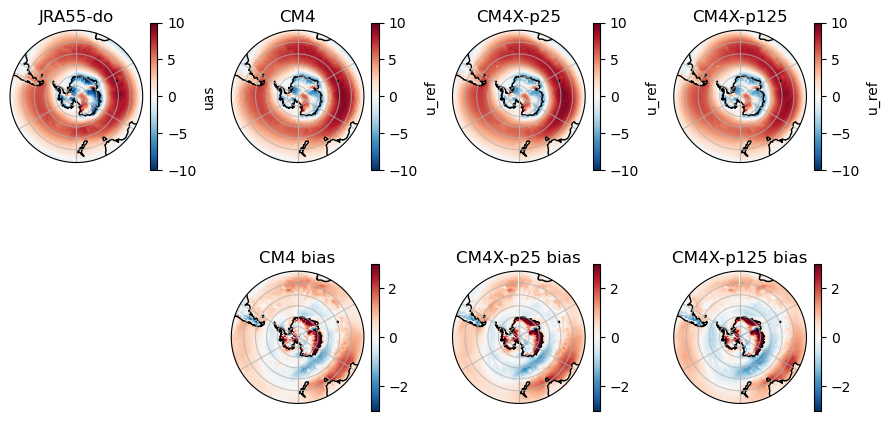

In [37]:
titles = ["JRA55-do", "CM4", "CM4X-p25", "CM4X-p125",
          "", "CM4 bias", "CM4X-p25 bias", "CM4X-p125 bias"]

fig,axs = plt.subplots(ncols=4, nrows=2, sharey=True, 
                       subplot_kw={'projection': ccrs.SouthPolarStereo()},
                       figsize=(9,5))
axs=axs.flatten()

u10_jra.mean(dim="time").plot(ax=axs[0], 
                              transform=ccrs.PlateCarree(), 
                              vmin=-10, vmax=10, extend="neither",
                              cmap=plt.get_cmap("RdBu_r"),
                              cbar_kwargs = {"aspect":20, "fraction":.05})
u10_2.mean(dim="time").plot(ax=axs[1], 
                              transform=ccrs.PlateCarree(), 
                              vmin=-10, vmax=10, extend="neither", 
                              cmap=plt.get_cmap("RdBu_r"),
                              cbar_kwargs = {"aspect":20, "fraction":.05})
u10_231.mean(dim="time").plot(ax=axs[2], 
                              transform=ccrs.PlateCarree(), 
                              vmin=-10, vmax=10, extend="neither", 
                              cmap=plt.get_cmap("RdBu_r"),
                              cbar_kwargs = {"aspect":20, "fraction":.05})
u10_255.mean(dim="time").plot(ax=axs[3], transform=ccrs.PlateCarree(), 
                              vmin=-10, vmax=10, extend="neither", 
                              cmap=plt.get_cmap("RdBu_r"),
                              cbar_kwargs = {"aspect":20, "fraction":.05})
(u10_2.mean(dim="time") - u10_jra_c96.mean(dim="time")).plot(ax=axs[5], 
                                                                  transform=ccrs.PlateCarree(),
                                                                  vmin= -3, vmax=3, extend="neither",
                                                                  cmap= plt.get_cmap("RdBu_r"),
                                                                  cbar_kwargs = {"aspect":20, "fraction":.05})
(u10_231.mean(dim="time") - u10_jra_c192.mean(dim="time")).plot(ax=axs[6], 
                                                                  transform=ccrs.PlateCarree(),
                                                                  vmin= -3, vmax=3, extend="neither",
                                                                  cmap= plt.get_cmap("RdBu_r"),
                                                                  cbar_kwargs = {"aspect":20, "fraction":.05})
(u10_255.mean(dim="time") - u10_jra_c192.mean(dim="time")).plot(ax=axs[7], 
                                                                  transform=ccrs.PlateCarree(),
                                                                  vmin= -3, vmax=3, extend="neither",
                                                                  cmap= plt.get_cmap("RdBu_r"),
                                                                  cbar_kwargs = {"aspect":20, "fraction":.05})

for i in np.arange(8):
    axs[i].set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    axs[i].set_title(titles[i])

fig.delaxes(axs[4])
plt.tight_layout()

plt.savefig("/home/Katherine.Turner/SH_westerlies_JRAcomp.png", format="png", dpi=100)

# Location of surface jet
find latitude where winds have maximum value, 
similar to Jake's plots of the movement of the jetstream over the historical period

In [5]:
jet_era = u10_era.sel(lat=slice(-40,-60)).mean("time").idxmax(dim='lat')
jet_jra = u10_jra.sel(lat=slice(-60,-40)).mean("time").idxmax(dim='lat')
jet_odiv2 = u10_2.sel(lat=slice(-60,-40)).mean("time").idxmax(dim='lat')
jet_odiv231 = u10_231.sel(lat=slice(-60,-40)).mean("time").idxmax(dim='lat')
jet_odiv255 = u10_255.sel(lat=slice(-60,-40)).mean("time").idxmax(dim='lat')

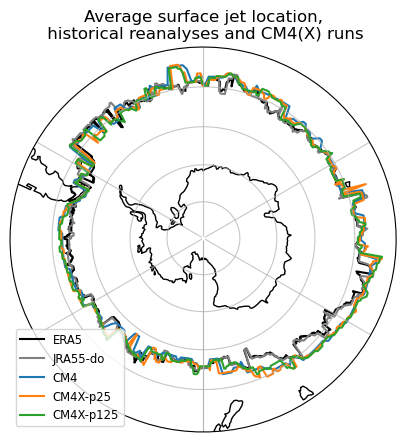

In [6]:
fig,axs = plt.subplots(subplot_kw={'projection': ccrs.SouthPolarStereo()},
                       figsize=(9,5))

jet_era.plot(transform=ccrs.PlateCarree(), color='k', label="ERA5")
jet_jra.plot(transform=ccrs.PlateCarree(), color='grey', label="JRA55-do")
jet_odiv2.plot(transform=ccrs.PlateCarree(), label="CM4")
jet_odiv231.plot(transform=ccrs.PlateCarree(), label="CM4X-p25")
jet_odiv255.plot(transform=ccrs.PlateCarree(), label="CM4X-p125")

axs.set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
axs.gridlines(alpha=0.7)
axs.set_boundary(circle, transform=axs.transAxes)
axs.coastlines()

plt.legend(loc="lower left", fontsize='small')
plt.title("Average surface jet location,\n historical reanalyses and CM4(X) runs")
plt.savefig("/home/Katherine.Turner/surfjet_hist.png", format="png", dpi=100)

In [ ]:
fig,axs = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},
                       figsize=(9,5))

jet_era.plot(transform=ccrs.PlateCarree(), color='k', label="ERA5")
jet_jra.plot(transform=ccrs.PlateCarree(), color='grey', label="JRA55-do")
jet_odiv2.plot(transform=ccrs.PlateCarree(), label="CM4")
jet_odiv231.plot(transform=ccrs.PlateCarree(), label="CM4X-p25",)
jet_odiv255.plot(transform=ccrs.PlateCarree(), label="CM4X-p125")

axs.coastlines()
#plt.tight_layout()
axs.set_extent([-180, 180, -90, -40], ccrs.PlateCarree())

#plt.legend(loc="lower left", fontsize='small')
#plt.title("Average surface jet location,\n historical reanalyses and CM4(X) runs")